<a href="https://colab.research.google.com/github/Swathi014/22ITCS100-Advanced-Machine-Learning/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Polynomial Regression

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial

It is also called the special case of Multiple Linear Regression in ML. Because we add some polynomial terms to the Multiple Linear regression equation to convert it into Polynomial Regression

How do we fit the model to this data
To map our old linear hypothesis and cost functions to these polynomial descriptions the easy thing to do is set
- x1 = x
- x2 = x^2
- x3 = x^3
By selecting the features like this and applying the linear regression algorithms you can do polynomial linear regression
Remember, feature scaling becomes even more important here

# Cost Function & Gradient Descent

# Example: Predicting corona Cases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
#Data download: https://dashboard.kerala.gov.in/covid/dailyreporting-view-public-districtwise.php

In [5]:
###Step-1:LOAD DATA ####
data = pd.read_csv('/content/drive/MyDrive/MTECH/Dataset/coronaCases.csv',sep =',')
data = data[['Id','Confirmed']]
print('-'*30);print('HEAD');print('-'*30)
print(data.head())

------------------------------
HEAD
------------------------------
   Id  Confirmed
0   1       6334
1   2       6753
2   3       6960
3   4       6036
4   5       3361


------------------------------
PREPARE DATA
------------------------------


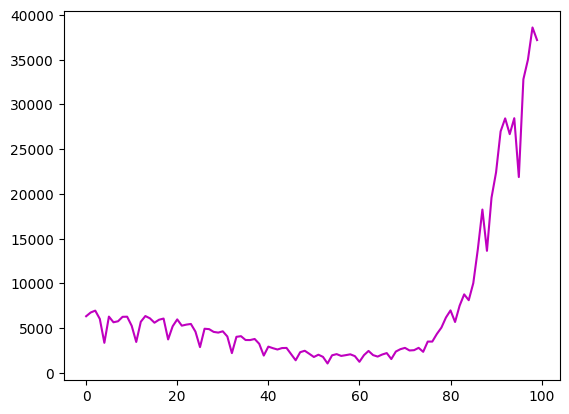

In [6]:
#### Step-2:PREPARE DATA ####
print('-'*30);print('PREPARE DATA');print('-'*30)
x = np.array(data['Id']).reshape(-1, 1)
y = np.array(data['Confirmed']).reshape(-1, 1)
plt.plot(y,'-m')
#plt.show()
polyFeat = PolynomialFeatures(degree=3)
x = polyFeat.fit_transform(x)
#print(x)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

------------------------------
TRAINING DATA
------------------------------
Accuracy:94.184 %


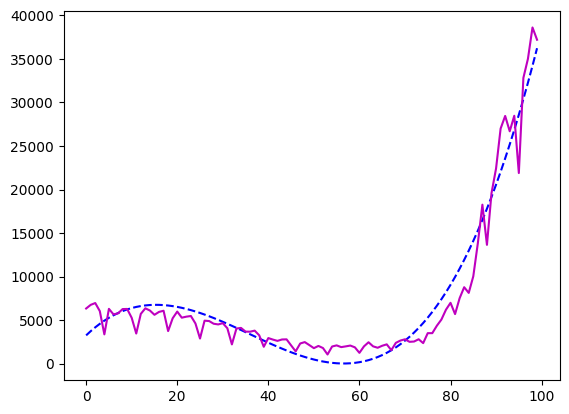

In [7]:
#### Step-3:TRAINING DATA ####
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)
plt.plot(y0,'--b')
plt.plot(y,'-m')
plt.show()

In [8]:
#### Step-4:PREDICTION ####
Add_days = 4
cur_day= y.shape[0]
pred_day =cur_day+Add_days
X_poly_fit=polyFeat.fit_transform([[pred_day]])
y_pred =model.predict(X_poly_fit)
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Cases after {Add_days} days:',end='')
print(round(int(y_pred)/1000,2),'Thousdands')

------------------------------
PREDICTION
------------------------------
Prediction - Cases after 4 days:45.03 Thousdands


/tmp/ipython-input-3812700254.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(round(int(y_pred)/1000,2),'Thousdands')


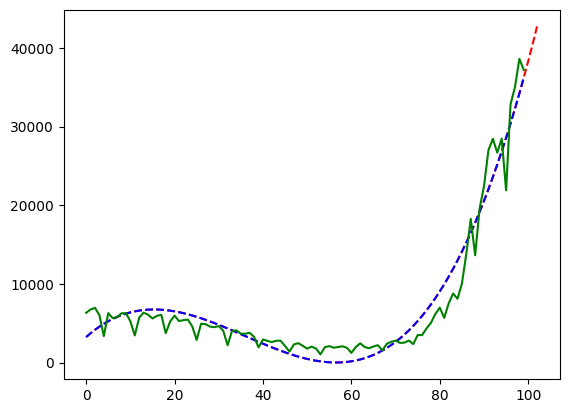

In [9]:
x1 = np.array(list(range(1,pred_day))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y0,'--b')
plt.plot(y,'-g')
plt.show()